In [39]:
import numpy as np 
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MNIST Model

In [53]:
train_df = pd.read_csv(os.path.join('.', 'archive', 'sign_mnist_train', 'sign_mnist_train.csv'))
test_df = pd.read_csv(os.path.join('.', 'archive', 'sign_mnist_test', 'sign_mnist_test.csv'))

In [54]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [55]:
num_classes = 24
train_labels = train_df['label']
test_labels = test_df['label']
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_labels)
y_test = label_binarizer.fit_transform(test_labels)

train_imgs = ((train_df.loc[:, train_df.columns != 'label']).values/255).reshape(-1,28,28,1)
test_imgs = ((test_df.loc[:, test_df.columns != 'label']).values/255).reshape(-1,28,28,1)

3


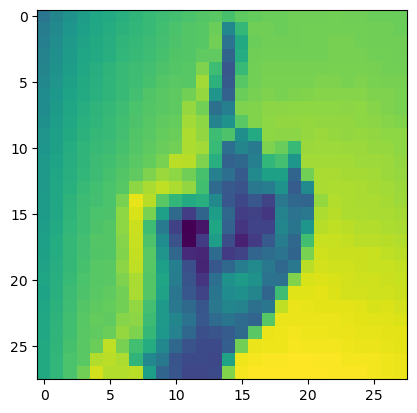

In [66]:
plt.imshow(train_imgs[0], cmap = "gray")
print(train_labels[0])

In [57]:
t_transform = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    fill_mode='nearest'
)

t_generator = t_transform.fit(train_imgs)

In [67]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [68]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [69]:
history = model.fit(t_transform.flow(train_imgs, y_train, batch_size = 128), epochs = 20, validation_data = (test_imgs, y_test))

Epoch 1/20
215/215 [==============================] - 23s 101ms/step - loss: 1.7337 - accuracy: 0.4494 - val_loss: 4.2900 - val_accuracy: 0.0474
Epoch 2/20
215/215 [==============================] - 23s 104ms/step - loss: 0.6397 - accuracy: 0.7820 - val_loss: 4.1417 - val_accuracy: 0.0891
Epoch 3/20
215/215 [==============================] - 24s 110ms/step - loss: 0.3818 - accuracy: 0.8719 - val_loss: 0.7986 - val_accuracy: 0.6930
Epoch 4/20
215/215 [==============================] - 25s 114ms/step - loss: 0.2738 - accuracy: 0.9076 - val_loss: 0.8227 - val_accuracy: 0.7500
Epoch 5/20
215/215 [==============================] - 49s 227ms/step - loss: 0.2057 - accuracy: 0.9318 - val_loss: 0.2088 - val_accuracy: 0.9250
Epoch 6/20
215/215 [==============================] - 47s 218ms/step - loss: 0.1787 - accuracy: 0.9392 - val_loss: 0.3582 - val_accuracy: 0.8859
Epoch 7/20
215/215 [==============================] - 33s 155ms/step - loss: 0.1571 - accuracy: 0.9480 - val_loss: 1.5005 - val_ac

In [70]:
model.save("mnist_asl_model.keras")